In [1]:
pip install torch torchvision


Exercise 1:

i) Use the provided notebook file “Spiral.ipynb” to generate a “spiral” dataset. Use the generated spiral dataset to train an MLP. Minimize the training error rate by adjusting the design parameters (the number of hidden layers, the number of neurons in the hidden layers, batch
normalization, regularization, dropout et al.) of the MLP. Once you finish optimizing the
design of MLP, plot the training dataset and the learned decision boundary in the same
figure and report the training error rate.

Epoch [1/1000], Loss: 1.1281
Epoch [101/1000], Loss: 0.2035
Epoch [201/1000], Loss: 0.0815
Epoch [301/1000], Loss: 0.0520
Epoch [401/1000], Loss: 0.0397
Epoch [501/1000], Loss: 0.0327
Epoch [601/1000], Loss: 0.0283
Epoch [701/1000], Loss: 0.0253
Epoch [801/1000], Loss: 0.0231
Epoch [901/1000], Loss: 0.0214


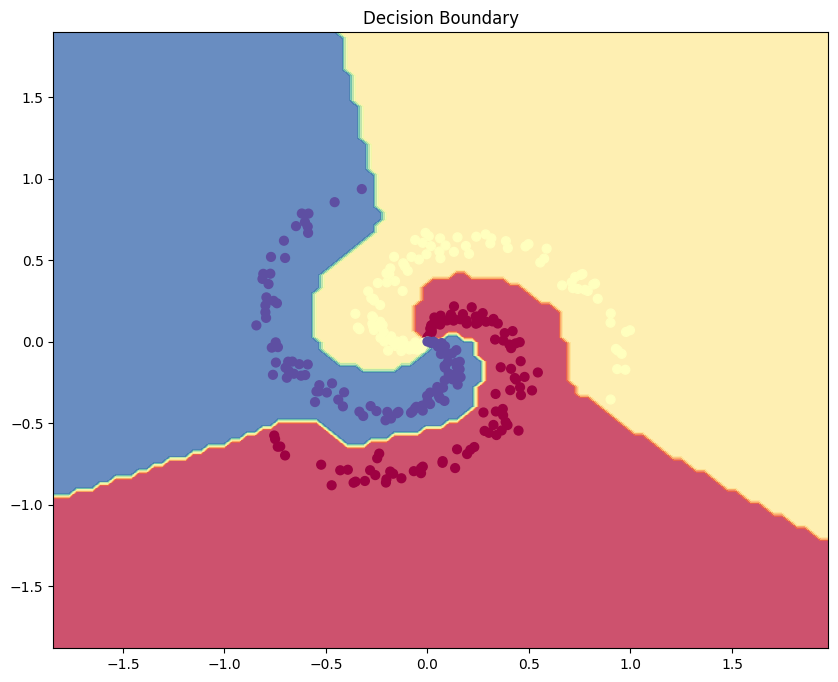

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

#function to generate the spiral dataset
def generate_spiral_data(N=100, D=2, K=3):                                      #defining a function to generate spiral data
    X = np.zeros((N*K, D))                                                      #initializing an array for data points
    y = np.zeros(N*K, dtype='uint8')                                            #initializing an array for labels
    for j in range(K):                                                          #looping over each class
        ix = range(N*j, N*(j+1))                                                #generating indices for the current class
        r = np.linspace(0.0, 1, N)                                              #generating a linear space for radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2               #generating angles with some noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]                                 #creating the spiral data points
        y[ix] = j                                                               #assigning class labels
    return X, y                                                                 #returning the data/labels

X, y = generate_spiral_data()                                                   #generating/retrieving the spiral data/labels
X = torch.FloatTensor(X)                                                        #converting data to a PyTorch Float Tensor
y = torch.LongTensor(y)                                                         #converting labels to a PyTorch Long Tensor

#MLP model in PyTorch
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):                   #initializing the model
        super(SimpleMLP, self).__init__()                                       #initializing the superclass
        self.fc1 = nn.Linear(input_size, hidden_size)                           #first fully connected layer
        self.relu = nn.ReLU()                                                   #reLU activation function
        self.fc2 = nn.Linear(hidden_size, output_size)                          #second fully connected layer
        self.softmax = nn.LogSoftmax(dim=1)                                     #softmax function for output

    def forward(self, x):                                                       #defining the forward pass
        out = self.fc1(x)                                                       #passing input through the first layer
        out = self.relu(out)                                                    #applying ReLU activation
        out = self.fc2(out)                                                     #passing through the second layer
        out = self.softmax(out)                                                 #applying softmax to output
        return out                                                              #returning the final output

input_size = 2                                                                  #setting input size
hidden_size = 100                                                               #setting hidden layer size
output_size = 3                                                                 #setting output size (#-classes)
model = SimpleMLP(input_size, hidden_size, output_size)                         #initializing the model
criterion = nn.CrossEntropyLoss()                                               #setting the loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)                             #setting the optimizer with a learning rate

#training Loop
for epoch in range(1000):
    optimizer.zero_grad()                                                       #resetting gradients at each epoch
    output = model(X)                                                           #getting model output for input data
    loss = criterion(output, y)                                                 #calculating loss
    loss.backward()                                                             #performing backpropagation
    optimizer.step()                                                            #updating model parameters
    if epoch % 100 == 0:                                                        #printing loss every 100 epochs
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

#plotting Decision Boundary
def plot_decision_boundary():
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    spacing = min(x_max - x_min, y_max - y_min) / 100
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                         np.arange(y_min, y_max, spacing))
    data = torch.FloatTensor(np.hstack((XX.ravel().reshape(-1,1),
                                        YY.ravel().reshape(-1,1))))
    db_pred = model(data).max(1)[1]
    Z = db_pred.reshape(XX.shape)
    plt.figure(figsize=(10,8))
    plt.contourf(XX, YY, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    plt.title("Decision Boundary")

#plotting
plot_decision_boundary()
plt.show()


ii)Use the provided notebook file “Spiral.ipynb” to generate a second “spiral” dataset. Use the
generated spiral dataset as a test dataset to test the performance of the learned MLP. Is the
performance on the test dataset consistent with that on the training dataset? If yes, plot
the test dataset and the decision boundary on the same plot and report the test error rate.
If not, go back to Part i) and re-adjust the design of the MLP so that its performance on the
training dataset actually generalizes to the test dataset.

Test Loss: 0.0396, Test Accuracy: 98.67%, Test Error: 1.33%


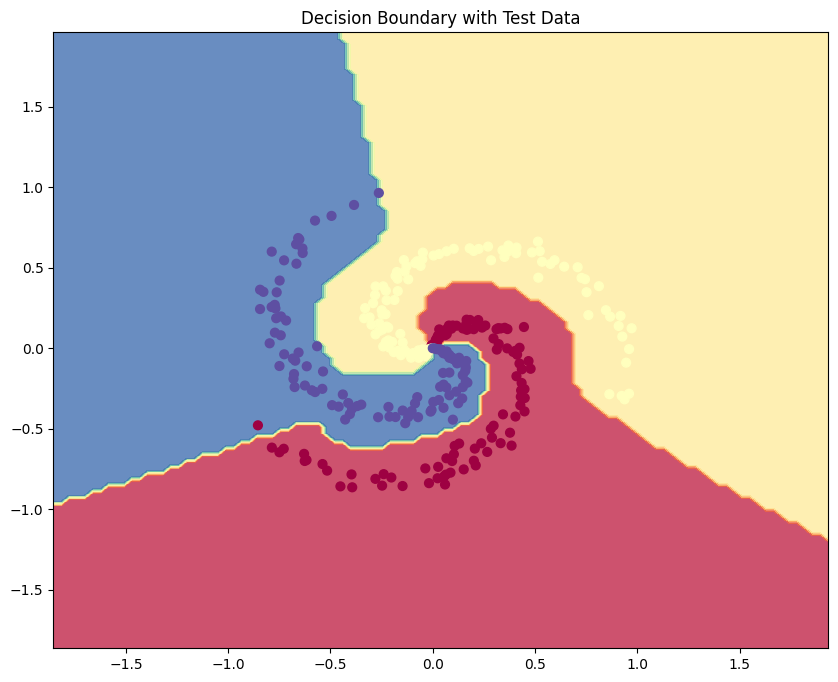

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


#generate the second spiral dataset for testing
X_test, y_test = generate_spiral_data()                                         #generating test spiral data using the predefined function
X_test = torch.FloatTensor(X_test)                                              #converting test data to PyTorch Float Tensor
y_test = torch.LongTensor(y_test)                                               #converting test labels to PyTorch Long Tensor

#test the performance of the learned MLP
with torch.no_grad():                                                           #disabling gradient calculations for evaluation
    y_pred = model(X_test)                                                      #getting predictions from the model on test data
    test_loss = nn.CrossEntropyLoss()(y_pred, y_test)                           #calculating the loss
    _, predicted = torch.max(y_pred.data, 1)                                    #getting the predicted classes
    total = y_test.size(0)                                                      #counting the total number of test samples
    correct = (predicted == y_test).sum().item()                                #counting the number of correct predictions
    test_accuracy = correct / total * 100                                       #calculating test accuracy
    test_error = (1 - test_accuracy / 100) * 100                                #calculating test error
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy:.2f}%, Test Error: {test_error:.2f}%')

#function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    spacing = min(x_max - x_min, y_max - y_min) / 100
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                         np.arange(y_min, y_max, spacing))
    data = torch.FloatTensor(np.hstack((XX.ravel().reshape(-1,1),
                                        YY.ravel().reshape(-1,1))))
    with torch.no_grad():
        db_pred = model(data).max(1)[1]
    Z = db_pred.reshape(XX.shape)
    plt.figure(figsize=(10,8))
    plt.contourf(XX, YY, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    plt.title("Decision Boundary with Test Data")

#plotting decision boundary
plot_decision_boundary(model, X_test.numpy(), y_test.numpy())
plt.show()


Exercise 2:

i) Load the MNIST data from the provided file using PyTorch’s Torchvision library. Split the
data into a training dataset and a test dataset.

In [8]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

#convert images to PyTorch tensors and normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#load the training data
trainset = torchvision.datasets.MNIST(root='/content/data',
                                      train=True,
                                      download=True,
                                      transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

#load the test data
testset = torchvision.datasets.MNIST(root='/content/data',
                                     train=False,
                                     download=True,
                                     transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 169697473.23it/s]

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 38201101.81it/s]


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32453128.03it/s]


Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7766216.38it/s]


Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw



ii) Use the training dataset to train a CNN and evaluate the performance of the learned neural
network using the test dataset. Minimize the test error rate by optimizing the architecture
of the neural network. Report the architecture of the neural network that gave you the
smallest test error rate.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

#define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()                                       #calling the initializer of the parent class nn.Module
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)       #defining the first convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)      #defining the second convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)            #defining a max pooling layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128)                                   #defining the first fully connected layer
        self.fc2 = nn.Linear(128, 10)                                           #defining the second fully connected layer
        self.relu = nn.ReLU()                                                   #defining the ReLU activation function

    def forward(self, x):                                                       #defining the forward pass of the network
        x = self.pool(self.relu(self.conv1(x)))                                 #applying first conv layer, ReLU, then pooling
        x = self.pool(self.relu(self.conv2(x)))                                 #applying second conv layer, ReLU, then pooling
        x = x.view(-1, 64 * 7 * 7)                                              #flattening the output for the fully connected layer
        x = self.relu(self.fc1(x))                                              #applying first fully connected layer with ReLU
        x = self.fc2(x)                                                         #applying second fully connected layer
        return x

model = SimpleCNN()

criterion = nn.CrossEntropyLoss()                                               #defining the loss function as cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)                            #defining the optimizer as Adam

num_epochs = 5


for epoch in range(num_epochs):
    for data in trainloader:                                                    #iterating over each batch in the trainloader
        inputs, labels = data                                                   #unpacking data into inputs and labels
        optimizer.zero_grad()                                                   #clearing the gradients of all optimized variables
        outputs = model(inputs)                                                 #forward pass
        loss = criterion(outputs, labels)                                       #calculating the batch loss
        loss.backward()                                                         #backward pass
        optimizer.step()                                                        #perform a single optimization step (parameter update)

correct = 0                                                                     #initializing the correct predictions count
total = 0                                                                       #initializing the total predictions count
with torch.no_grad():                                                           #disabling gradient calculations
    for data in testloader:                                                     #iterating over each batch in the testloader
        images, labels = data                                                   #unpacking data into images and labels
        outputs = model(images)                                                 #forward pass
        _, predicted = torch.max(outputs.data, 1)                               #get the predicted class from the highest model output
        total += labels.size(0)                                                 #incrementing the total count
        correct += (predicted == labels).sum().item()                           #incrementing the correct count if prediction matches the label

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {test_accuracy}%')


Accuracy of the network on the test images: 98.86%
